In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Membaca dataset
data = pd.read_csv("Dataset/Cleaned_data_for_model.csv")

# Mengambil 100 baris pertama
data_100 = data.head(100)

# menyimpan dataset yang sudah di ambil
data_100.to_csv("House_Prices_100.csv", index=False)



In [29]:
print(data.head())
print(data.info())

   Unnamed: 0 property_type     price     location       city  baths  \
0           0          Flat  10000000         G-10  Islamabad      2   
1           1          Flat   6900000         E-11  Islamabad      3   
2           2         House  16500000         G-15  Islamabad      6   
3           3         House  43500000    Bani Gala  Islamabad      4   
4           4         House   7000000  DHA Defence  Islamabad      3   

    purpose  bedrooms  Area_in_Marla  
0  For Sale         2            4.0  
1  For Sale         3            5.6  
2  For Sale         5            8.0  
3  For Sale         4           40.0  
4  For Sale         3            8.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   

In [30]:
df = pd.read_csv('Dataset/Cleaned_data_for_model.csv')

In [31]:
# Preprocessing
# Label encoding untuk variabel kategorikal
le = LabelEncoder()
df['property_type_encoded'] = le.fit_transform(df['property_type'])
df['location_encoded'] = le.fit_transform(df['location'])
df['city_encoded'] = le.fit_transform(df['city'])
df['purpose_encoded'] = le.fit_transform(df['purpose'])

In [32]:
# Pilih fitur untuk model
features = ['property_type_encoded', 'location_encoded', 'city_encoded', 
           'baths', 'bedrooms']
X = df[features]
y = df['price']

In [33]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Prediksi
y_pred = model.predict(X_test)

In [36]:
# Hitung metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")

Model Performance Metrics:
Mean Squared Error (MSE): 80,092,723,933,338.70
Root Mean Squared Error (RMSE): 8,949,453.83
R-squared (R²): 0.3003


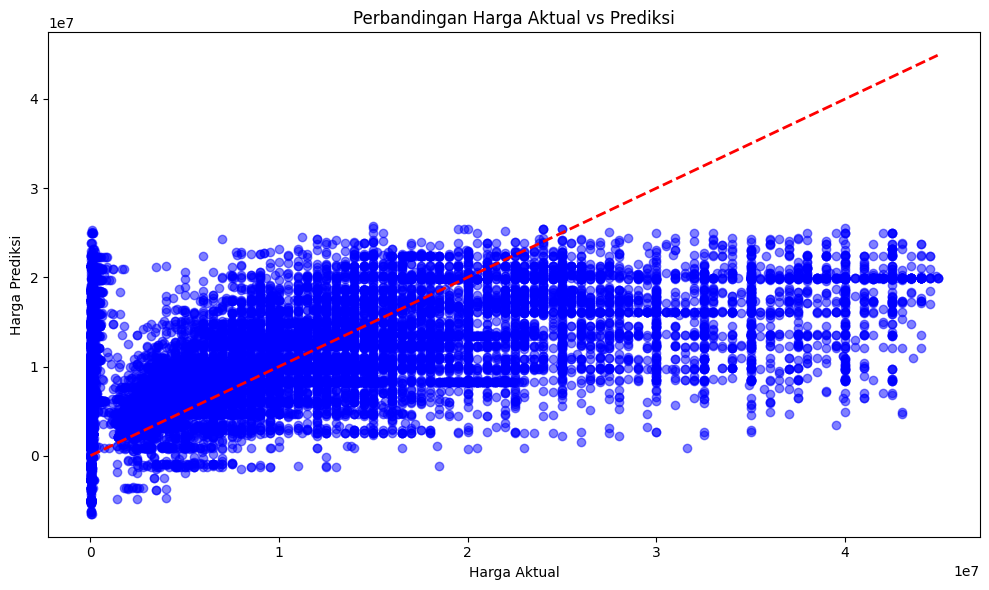

In [37]:
# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Perbandingan Harga Aktual vs Prediksi')
plt.tight_layout()
plt.show()

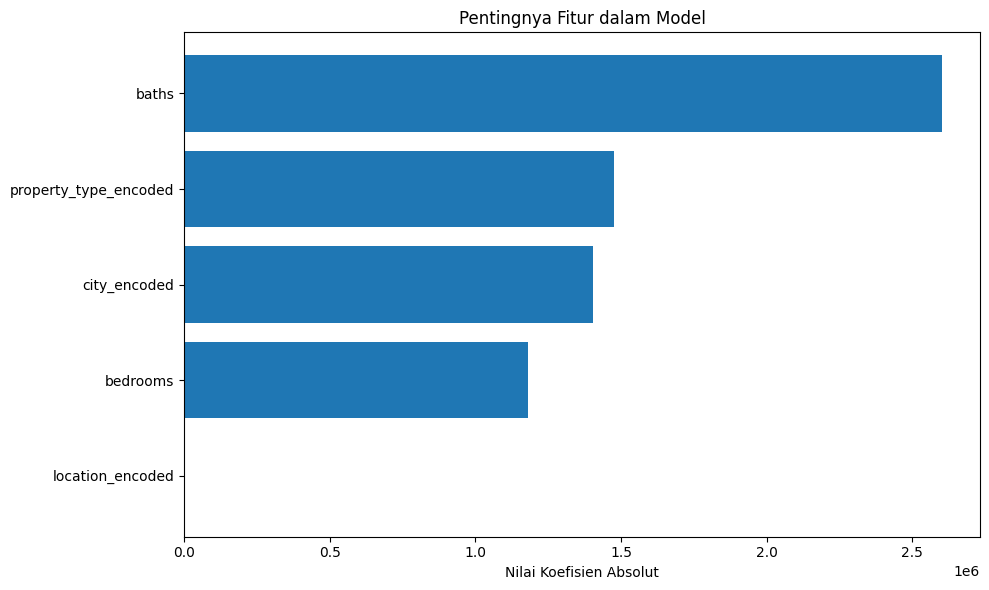

In [38]:
# Visualisasi Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': abs(model.coef_)
})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Nilai Koefisien Absolut')
plt.title('Pentingnya Fitur dalam Model')
plt.tight_layout()
plt.show()

In [39]:
# Print koefisien fitur
print("\nKoefisien Fitur:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Koefisien Fitur:
property_type_encoded: -1475940.4728
location_encoded: 656.9535
city_encoded: 1405319.8868
baths: 2602650.4510
bedrooms: 1182142.7161
Intercept: -3093322.1524
